/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


Average MSE on Train data:  [[5698.98287265]]
Average Accuracy on Train data:  0.9052
Average MSE on Test data:  [[5617.21537258]]
Average Accuracy on Test data:  0.9048


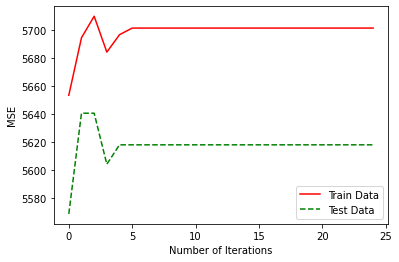

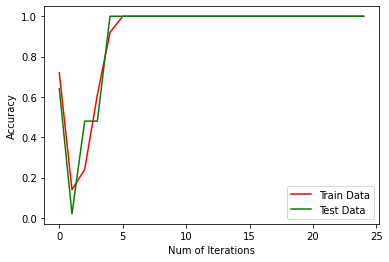

In [1]:
#Question 2.1 & 2.2 Gideon Adele ML Assignment
import numpy as np
import matplotlib.pyplot as plt
import random

# Reading the data
x_train=np.loadtxt("/content/X_train.csv")
y_train=np.loadtxt("/content/Y_train.csv")
x_test=np.loadtxt("/content/X_test.csv")
y_test=np.loadtxt("/content/Y_test.csv")

#taking the label/output column and reshaping
x= x_train
y_test = y_test.reshape(50,1)
y = y_train.reshape(100,1)

#Setting w1,w2,b1,b2 and learning rate
number_of_neurons=5
w1=np.random.rand(number_of_neurons,2)
b1=np.random.rand(number_of_neurons,1)
w2=np.random.rand(1,number_of_neurons)
b2=np.random.rand(1,1)
learning_rate=1

#learning_rate_range=np.random.uniform(0.001,1,25) #taking 25 learning between 0.001 and 1

#Using the sigmoid function
def sigmoid (inp):
    return 1/(1+np.exp(-inp))

mse_list2=[]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]
t11_list=[]

for i in range (25):
    mse_list1=[]
    t1_list=[]
    t2_list=[]
    
    for j in range (100):
        #Forward feed
        z1=np.dot(w1,x[j].reshape(2,1))+b1
        a1=sigmoid(z1)
        z2=np.dot(w2,a1)+b2
        a2=sigmoid(z2)
        #print(a2)
        aa=np.round(a2,0)

        #below if-else has been used to get the accuracy info
        if y[j]== aa or a2:
            t1_list.append(1)
        else:
            t2_list.append(1)

        #Backprop
        dz2=a2-y[j].reshape(1,1)
        dw2=np.dot(dz2,a1.T)
        db2=dz2

        dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
        dw1=np.dot(dz1,x[j].reshape(2,1).T)
        db1=dz1
        #update rules for the network
        w1=w1-learning_rate*dw1
        b1=b1-learning_rate*np.mean(db1)
        w2=w2-learning_rate*dw2
        b2=b2-learning_rate*np.mean(db2)
        #MSE claculation
        mse_ = ((y[j] - a2)**2)
        mse_list1.append(mse_)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a=sum(mse_list1)/100
    mse_list2.append(a)
    b=(len(t1_list))/100
    t11_list.append(b)


print("Average MSE on Train data: ",sum(mse_list2)/25)
print("Average Accuracy on Train data: ",sum(t11_list)/25)

mse_list4=[]
t33_list=[]
#This is the loop for the test data, training is not done here, I just use the 25 updated values here, u may just use the 25th updated one.
for i in range (len (w1_list)):
    t3_list=[]
    t4_list=[]
    mse_list3=[]
    for j in range (50):
        z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1=sigmoid(z1)
        z2=np.dot(w2_list[i],a1)+b2_list[i]
        a2=sigmoid(z2)
        #print(a2)
        aa=np.round(a2,0)
        y[j]=np.round(y[j],0)
        #Accuracy measure
        if y[j]== aa or a2:
            t3_list.append(1)
        else:
            t4_list.append(1)

        mse= ((y_test[j]- a2)**2)
        mse_list3.append(mse)


    #print(t1,t2)
    a=sum(mse_list3)/50
    mse_list4.append(a)
    b=(len(t3_list))/50
    t33_list.append(b)
print("Average MSE on Test data: ",sum(mse_list4)/25)
print("Average Accuracy on Test data: ",sum(t33_list)/25)

L1=[k for i in mse_list2 for j in i for k in j]
plt.plot(np.arange(25),L1,'r-')
L1=[k for i in mse_list4 for j in i for k in j]
plt.plot(np.arange(25),L1,'g--')
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))
plt.show()

plt.plot(np.arange(25),t11_list,'r')
plt.plot(np.arange(25),t33_list,'g')
plt.xlabel("Num of Iterations")
plt.ylabel("Accuracy")
plt.legend(('Train Data','Test Data'))
plt.show()